### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

### Load the data

In [7]:
data_preprocessed = pd.read_csv('data/Absenteeism-preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


We will use a logistic regression which will take the reason for absence month of the year day of the week transportation expense distance to work age daily work load average education children and pets of a given employee and we'll predict their absenteeism we expect that half of those predictors won't have merit.
To me it seems that the reason for absence will be the most indicative maybe workload will have something to do with it as well since the busier a person is the less he or she will want to skip work. Finally children and pets together with distance from work should also have something to do with absenteeism. If your child or pet is sick at home you'll have to go home take them to the doctor and get them back which will be much more time consuming than a simple visit to the doctor OK. We have a good idea what to expect.

### Create the Target

We've got a bit more pre processing to do but it is of a different kind. We said we will use a logistic regression to predict absenteeism logistic regression is a type of classification so we will be basically classifying people into classes. What are these classes then.That's what we must settle first and then pre process our data to reflect this decision the approach we will use here is to create two classes one representing people who have been excessively absent and another which represents people that haven't for this exercise. We will use a methodology which is a tiny bit naive but quite numerically stable.We will take the median value of the absenteeism time into our cell everything below the median would be considered normal. Everything above the median would be excessive OK let's find that median there is the panda's method called median which can help us with this task.

In [9]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

Good **three hours** is our cutoff line. If an observation has been absent for less than three hours we will assign it the value of zero. Otherwise the value of 1 in supervised machine learning we call these zeros and ones targets. These are the values we are aiming for. Our task will be to predict whether we will obtain a zero or a one. So let's create a new variable called targets which will measure if a person has been absent for more than three hours. The `np.where` function in this method is constructed with three arguments a condition, value of true and value if false. Our condition is that the series absenteeism time and hours from data pre processed is bigger than 3 if it is true. We want the function to return 1 otherwise zero.

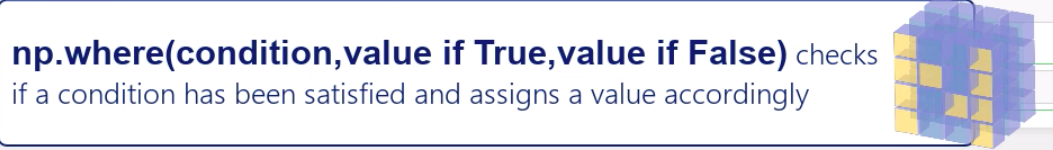

In [10]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(),1,0)

In [11]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

I told you that using the median as a cutoff line is numerically stable and rigid. That's because by using the median we have implicitly balance the dataset roughly half of the targets are zeros while the other half ones as you may remember this will prevent our model from learning to output one of the two classes exclusively thinking it did very well in order to prove that. Let's divide the number of targets that are ones by the total number of targets the number of targets that are ones can be found by summing up all values of targets while the total number of targets is simply the shape on axis 0.

In [12]:
targets.sum()/targets.shape[0]

0.45571428571428574

The result is around zero point four six. So around forty six percent of the targets are ones thus around 54 percent of the targets are zeros.So our result will do for this exercise let's proceed noting that our two groups have been distributed roughly equally finally let's drop the absenteeism time and hours from the data frame since we won't be needing it.

In [14]:
#let's add the targets to the data frame data pre processed.
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [15]:
#Let's drop the 'Absenteeism Time in Hours' column and create new data and continiue with it 

data_with_target = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)
data_with_target.head()


,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


### Select the inputs for our regression.
We will use the panda's method iloc, since it is extremely useful and common. There are two arguments.
The first one refers to the row indices and the second one two column indices.
```python
#select (slices)data by position where given rows and columns wanted
DataFrame.iloc[row indices, column incides]
```
I would actually prefer to select all rows so I can simply leave colons in the brackets as the first argument to select the inputs for our regression. We must select all rows and all columns except for `excessive absenteeism`. 
```python
data_with_target.iloc[:,:14]
#OR 
data_with_target.iloc[:,:-1]
```

Both method is fine, Let's use last one and assign the results `unscaled_inputs` variable

In [18]:
data_with_target.shape

(700, 15)

In [16]:
unscaled_inputs = data_with_target.iloc[:,:-1]
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


### Standardize the data

It is time to standardize our data. Let's import the relevant module from S.K. learn. First we must declare a standard scalar object.  Note that we have created an empty standard scalar object. There is no information in it for those of you that haven't seen scaling with standard scalar.
**Standard scalar is subtract the mean and divide by the standard deviation from each point variable**
The next step is to fit our input data. We write absenteeism scalar.fit unskilled inputs this line will calculate the mean and standard deviation of each feature from unskilled inputs. This information will be stored in the absenteeism scale object so it won't be an empty object anymore. It will contain information about the mean and standard deviation. This is extremely important whenever you get new data you will know that the standardization information is contained in the absenteeism scalar. Thus you'll be able to standardize the new data in the same way. Remember this as it will be very useful later on. OK so we have the information but the inputs are still on scaled. We have just prepare the scaling mechanism in order to apply it. We must use another method called transform so let's scale inputs be equal to absenteeism scalar dot transform unskilled inputs this operation transforms the unskilled inputs using the information contained in absenteeism scalar in simple words we subtract the mean and divide by the standard deviation whenever we get new data we will just apply absenteeism scalar dot transform new data to reach the same transformation as we just did. This is the most common and useful way to transform New data.

In [21]:
#Standard scalar is subtract the mean and divide by the standard deviation from each point variable
from sklearn.preprocessing import StandardScaler

#Let's created an empty standard scalar object
absenteeism_scaler = StandardScaler()

#fit our input data, this will calculate the mean and standard deviation of each feature from unskilled inputs
absenteeism_scaler.fit(unscaled_inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
#Until we transform the data inputs still on non-scaled. For using this method we always transform new data
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [23]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [24]:
scaled_inputs.shape

(700, 14)

### Split to the data into train & test 
We will split the dataset into train and test so we can assess the model's accuracy on data.Sklearn has a pretty neat method of splitting the data into train and test in order to use it. Split the train test split method is very powerful and has many arguments.The method to split the data the output we obtain consists of for arrays a
training dataset with inputs then a test data set with inputs a trained data set with targets and a test data set with targets. We will call them X_train X_test y_train and y_test.
 
We can see the shapes of these variables. This will be very indicative of what the train test split has actually achieved as you can see that 75% of the observations will help us with training and 25% will serve for testing as default.We can specify the train_size(or test_size) argument  equal to a certain value between 0 and 1 .

The train test split method has a shuffle parameter shuffle is a boolean so it can be either true or false by default. Shuffling is set to true. It may be a small issue for us when we rerun our code. We get a different shuffle and this means a different split. This causes the final model to defer every time due to the shuffling.
So the shuffle can make things difficult for us. There is a simple solution though all S.K. learn functions that include some randomness like the random shuffle here contain a random state parameter random state takes integer values. What we can do is set the random state to a number say 20. This will make the shuffle pseudo random.
It will always shuffle observations in the same random way.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size =0.2, random_state=20)

In [27]:
print(X_train.shape, y_train.shape)

(560, 14) (560,)


In [28]:
print(X_test.shape, y_test.shape)

(140, 14) (140,)


## LOGISTIC REGRESSION FOR SKLEARN

And now it's finally time for the modeling part as usual.Let's import the relevant modules since we are building a logistic regression.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics

In [30]:
#we must declare a new variable which will be a logistic regression object
reg = LogisticRegression()

#We must fit the regression.
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

`As an output we get all the parameters of the logistic regression object we specified above obviously they are all the default ones since we didn't specify anything. Each of those parameters has a special meaning which can improve our model one way or the other.`

For now let's focus on the results of this regression. It is easy to evaluate the model accuracy.

```python
sklearn.linear_model.LogisticRegression.score(inputs, targets) # HERE (X_train, y_train)
```

In [31]:
reg.score(X_train, y_train)

0.7803571428571429

`The result is around zero point eighty we conclude that our model has an accuracy of zero point eight or 80 percent. In other words based on the data we used our model learned to classify 80 percent of the observations`

#### Manually check the accuracy
Accuracy means that 80 percent of the model outputs match the targets so if we want to find the accuracy of a model manually we should find the outputs and compare them with the targets let's do that in order to find the model outputs. We will use a simple as K learned method. It is called predict.This method will find the predicted outputs of the regression the model itself is contained in the variable reg and we are choosing to predict the outputs associated with the training inputs and contained in X train. 

In [32]:
model_outputs = reg.predict(X_train)
model_outputs

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

We can see an array with zeros and ones. These are the predictions of our model. If we look at the difrences between using (model_outputs == targets) we can see that If there is a match the result is true. Otherwise it is false. Now we can clearly see which elements have been guessed correctly and which haven't but how many are there. if we  sum this array using np.sum. The result will be the total number of true entries and if we divide the number of matches by the total number of elements. We will get the accuracy.
let's divide the number of true entries by that

In [33]:
np.sum(model_outputs == y_train)/ model_outputs.shape[0]

0.7803571428571429

`What we get the exact same result as using the SKlearn methods score. However this time we have a much better idea of what that result means.`